In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Only one sequence will be simulated for demo purpose
genome_seq_list = ["TGCAGTTGGCGAGACGGTTGTCGCTGGCGGCTGAAATCGTGGAGCAGGGCCCTCGGTCGTTGCGATCAATATTCAGGCGGCGGGCGCCTAGATCTAACCTCACCGGTCCTGGACGAAGGAAGGTGGCGTACAATGTCGTGCTTACTGATCTTGTCGGCGATCGAGTTGTGAGGAGTGCATCGCAGTCCGCTTTGTAGCACTATACGCCGCCTGAGCAGGACAGGGGGCCGAGGAATAAGTAGTCAAGAGCCTGTATCTCCTACATCTTTTCATGTGTTCGCAGGTGGACTCTGATGTTACGTACCAGCTTGACGAATTTAGTCTTTTTTCAGAGGCACTAGAGTAGGTGAGCGAGGTACGCTAAG"]
number_of_rounds = 7 # Number of rounds to be performed for input sequence
print("Length of Input genome sequence: ",len(genome_seq_list[0]))

Length of Input genome sequence:  365


In [0]:
def genome_simulation(genome_seq_list,number_of_rounds,visuals="N"):
    """
    genome simulation function takes three parameters:
        list of genome sequences: List will contain all genome sequence which need to be simulated
        number of rounds: Number of rounds
        visualization flag: This flag used to enable visualization capabilities to show genome sequence and its mutation rate 
        
    """    
    
    # random mutation rate is a list which will hold random mutation rate between 10 to 50 snips per round for all rounds to be performed in simulation.
    random_mut_rate = [ random.randint(10,50) for i in range(0,number_of_rounds) ]  
    output_genome_seq_list = [] # this list holds output genome sequence after all rounds being performed
    print("Mutation Rate:", random_mut_rate)
    for seq_text in genome_seq_list:  # loop to simulate all input genome sequence from list
        inter_seq_list = [] # list to hold all intermediate genome sequence
        inter_seq_list.append(seq_text)
        #print("Input sequence:",seq_text)
        for index in range(0,number_of_rounds): # loop to perform mutation for all rounds
            mut_rate = random_mut_rate[index]
            snips_positions = [random.randint(0,len(seq_text)-1) for j in range(0,mut_rate)] # list to hold random position of snips as per the mutation rate which is between 0 to max length of input genome sequence
            print("Snips Positions in current sequence for Round:",index+1,snips_positions)
            seq_text_list = list(seq_text)            
            for snips_pos in snips_positions: # perform loop to change nucleobase for all snips positions as per the mutation rate
                if seq_text_list[snips_pos]== "A":
                    seq_text_list[snips_pos] = "T"
                elif seq_text_list[snips_pos]== "T":
                    seq_text_list[snips_pos]= "A"
                elif seq_text_list[snips_pos]== "G":
                    seq_text_list[snips_pos]= "C"
                else: 
                    seq_text_list[snips_pos]= "G"
            inter_seq_list.append(''.join(seq_text_list))
            #print("Intermediate sequence for Round:",index+1,''.join(seq_text_list))                    
        output_genome_seq_list.append(''.join(seq_text_list))
    if visuals == "Y" or visuals == "y": # calling function to visualize all rounds of mutation to provide better visibility of mutation rate
        sequence_visualization(inter_seq_list)
    return output_genome_seq_list   

In [0]:
def sequence_visualization(inter_seq_list):
    """
     sequence_visualization function helps to visulize all genome sequences from input till output including all rounds.
     Function applied color coding for each nucleobase and change in color from previous sequence shows the position of snips.
    """
    #rounds = len(inter_seq_list)
    sample_text = inter_seq_list[0]
    for index,sample_text in enumerate(inter_seq_list): # loop to show all sequences
      y_data = [1 for i in range(0,len(sample_text))] # y-axis data
      x_data = [j for j in range(0,len(sample_text))] # x-axis data(all nucleobase labels)
      #print(x_data)
      plt.figure(figsize=(150, 1))
      barlist=plt.bar(x_data,y_data,align='center',width=0.8)
      plt.xlim([0,len(sample_text)])
      plt.xticks(np.arange(len(sample_text)),list(sample_text))
      if index == 0:
        plt.yticks(np.arange(0, 2, 2),["Input"])    
      else:
        plt.yticks(np.arange(0, 2, 2),["Rnd "+str(index)])    
      for bar_index in range(0,len(sample_text)):
          if sample_text[bar_index] == "A":
              barlist[bar_index].set_color('r') 
          elif sample_text[bar_index] == "T":
              barlist[bar_index].set_color('g') 
          elif sample_text[bar_index] == "G":
              barlist[bar_index].set_color('b') 
          else:
              barlist[bar_index].set_color('c')             
      plt.show()
          
    #print(rounds)                
    #print(sample_text)

Mutation Rate: [49, 22, 43, 34, 37, 48, 26]
Snips Positions in current sequence for Round: 1 [5, 303, 273, 206, 61, 60, 16, 175, 89, 175, 164, 152, 192, 157, 97, 143, 12, 250, 183, 272, 222, 201, 43, 42, 203, 357, 158, 334, 11, 246, 169, 70, 128, 158, 214, 168, 94, 268, 7, 273, 149, 291, 160, 117, 242, 218, 61, 196, 359]
Snips Positions in current sequence for Round: 2 [54, 32, 12, 101, 355, 169, 88, 127, 123, 238, 49, 38, 299, 162, 131, 44, 28, 23, 8, 182, 117, 83]
Snips Positions in current sequence for Round: 3 [357, 9, 311, 322, 193, 334, 133, 197, 214, 131, 62, 202, 11, 287, 55, 277, 81, 128, 196, 106, 20, 186, 346, 253, 214, 117, 206, 347, 339, 155, 38, 12, 209, 283, 151, 155, 332, 158, 2, 121, 358, 176, 150]
Snips Positions in current sequence for Round: 4 [82, 203, 61, 32, 97, 269, 284, 84, 30, 45, 283, 5, 352, 205, 39, 350, 83, 84, 212, 9, 13, 271, 181, 265, 109, 13, 111, 212, 18, 84, 10, 200, 214, 53]
Snips Positions in current sequence for Round: 5 [359, 343, 54, 189, 330, 2

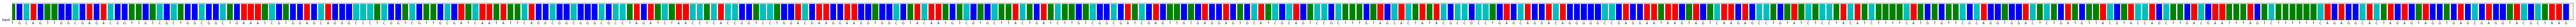

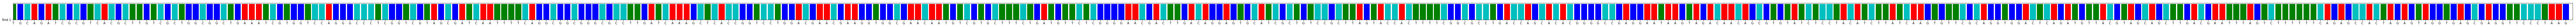

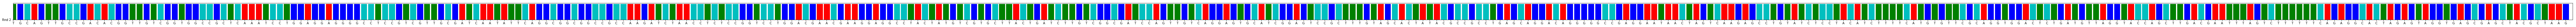

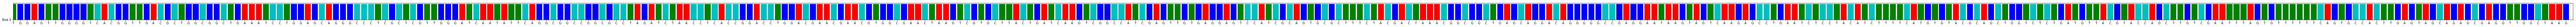

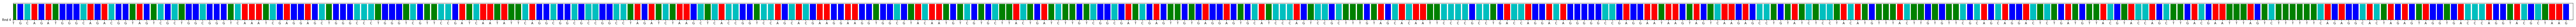

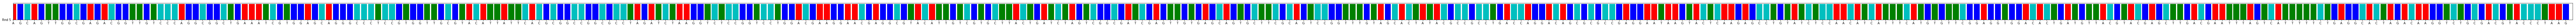

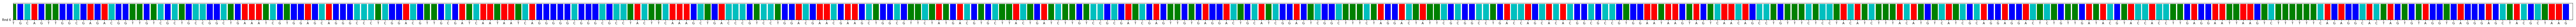

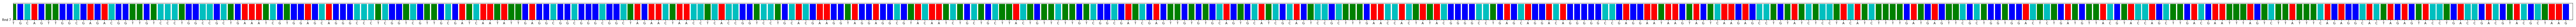

In [53]:
output_seq_list = genome_simulation(genome_seq_list,number_of_rounds,"y")

Output sequence for the input genome sequenece after random mutation rate:

In [25]:
print(output_seq_list[0])

AGCAGTTCGCGAGACGGTTGTCGGTGGCCGCTGAAATCGTGGACCAGGGCCCTCGGTCGTTGCGATCAATAATCAGGCGGGGGGCGCCTAGATCTAACGTCACCGGTCGTGGACGAAGGAAGGTGGCGTTGAAACTGGTGCTTAGTGATCATGTCGGCCATCGAGTTGTGACGAGTGCATCGCACTCCGCATTGTAGCACTATACGCCGCCTGAGCTCGACTGGGGGCCGTGGTATAAGTAGTCTTGAGCCTGTATCTCCTACATCTTTACATGTGTTCCCACGTGGACTCTGATGATACGTACCAGCTTGACGAATTTTGTCTTTATTCAGAGGCACTAGAGAAGCTGAGGGAGGTACGGTTAG
